Decision Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from public_tests2 import *
from utils5 import *

%matplotlib inline

/Users/jarjohns/ML/c2/public_tests2.py:81: SyntaxWarning: invalid escape sequence '\{'
  assert np.allclose(right, expected['right']) and np.allclose(left, expected['left']), f"Wrong value when target is at index 0. \nExpected: {expected} \ngot: \{left:{left}, 'right': {right}\}"
/Users/jarjohns/ML/c2/public_tests2.py:81: SyntaxWarning: invalid escape sequence '\}'
  assert np.allclose(right, expected['right']) and np.allclose(left, expected['left']), f"Wrong value when target is at index 0. \nExpected: {expected} \ngot: \{left:{left}, 'right': {right}\}"


In [2]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

view variables

In [3]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>


In [4]:
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


In [5]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


Decision Tree

Calculate Entropy

Exercise 1


In [6]:
def compute_entropy(y):
    """
    Computes the entropy for

    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)

    Returns:
        entropy (float): Entropy at that node

    """
    # You need to return the following variables correctly
    entropy = 0.

    ### START CODE HERE ###
    if len(y) != 0:
        p1 = len(y[y == 1]) / len(y)

        if p1 != 0 and p1 != 1:
            entropy = -p1 * np.log2(p1) - (1- p1)*np.log2(1 - p1)
        else:
            entropy = 0.
    ### END CODE HERE ###

    return entropy

In [7]:
# Compute entropy at the root node (i.e. with all examples)
# Since we have 5 edible and 5 non-edible mushrooms, the entropy should be 1"

print("Entropy at root node: ", compute_entropy(y_train))

# UNIT TESTS
compute_entropy_test(compute_entropy)

Entropy at root node:  1.0
 All tests passed. 


Split Dataset

Exercise 2

In [8]:
# UNQ_C2
# GRADED FUNCTION: split_dataset

def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches

    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on

    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """

    # You need to return the following variables correctly
    left_indices = []
    right_indices = []

    ### START CODE HERE ###
    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    ### END CODE HERE ###

    return left_indices, right_indices

CASE 1:
Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]


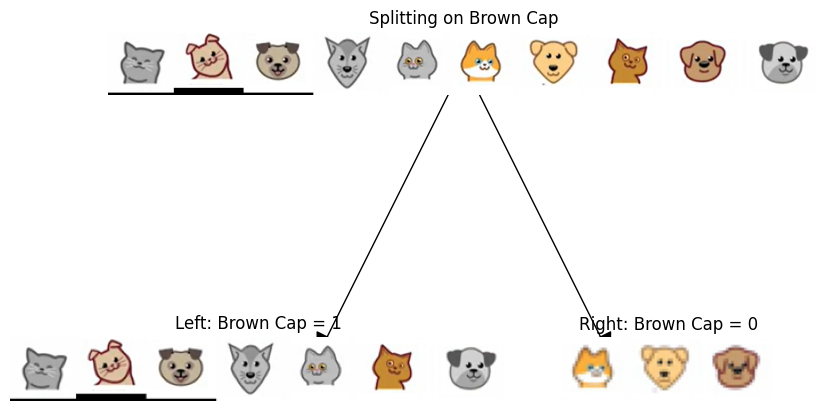


CASE 2:
Left indices:  [0, 2, 4]
Right indices:  [6, 8]


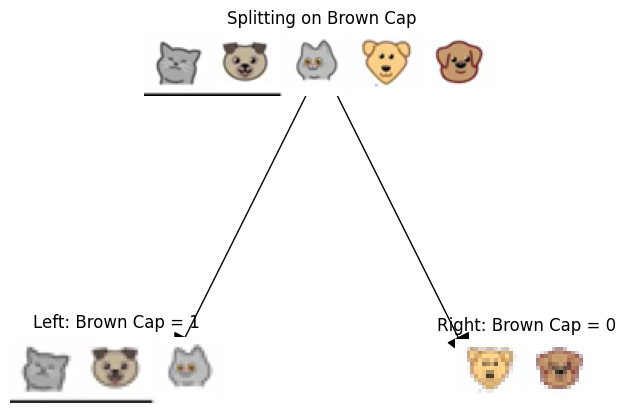

 All tests passed.


In [9]:
# Case 1

root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Feel free to play around with these variables
# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("CASE 1:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

# Visualize the split
generate_split_viz(root_indices, left_indices, right_indices, feature)

print()

# Case 2

root_indices_subset = [0, 2, 4, 6, 8]
left_indices, right_indices = split_dataset(X_train, root_indices_subset, feature)

print("CASE 2:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

# Visualize the split
generate_split_viz(root_indices_subset, left_indices, right_indices, feature)

# UNIT TESTS
split_dataset_test(split_dataset)

Calculate Information Gain

Exercise 3

In [10]:
# UNQ_C3
# GRADED FUNCTION: compute_information_gain

def compute_information_gain(X, y, node_indices, feature):

    """
    Compute the information of splitting the node on a given feature

    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        feature (int):           Index of feature to split on

    Returns:
        cost (float):        Cost computed

    """
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)

    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    # You need to return the following variables correctly
    information_gain = 0

    ### START CODE HERE ###
    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)

    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)

    weighted_entropy = w_left * left_entropy + w_right * right_entropy

    information_gain = node_entropy - weighted_entropy
    ### END CODE HERE ###

    return information_gain

In [11]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)

# UNIT TESTS
compute_information_gain_test(compute_information_gain)

Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377
 All tests passed.


Get Best Split

Exercise 4

In [12]:
# UNQ_C4
# GRADED FUNCTION: get_best_split

def get_best_split(X, y, node_indices):
    """
    Returns the optimal feature and threshold value
    to split the node data

    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """

    # Some useful variables
    num_features = X.shape[1]

    # You need to return the following variables correctly
    best_feature = -1

    ### START CODE HERE ###
    max_info_gain = 0

    # Iterate through all features
    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature

    ### END CODE HERE ##

    return best_feature

In [13]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

# UNIT TESTS
get_best_split_test(get_best_split)

Best feature to split on: 2
 All tests passed.


Building the Tree

In [14]:
# Not graded
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.

    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree.
        current_depth (int):    Current depth. Parameter used during recursive call.

    """

    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return

    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices)

    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))

    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))

    # continue splitting the left and the right child. Increment current depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]


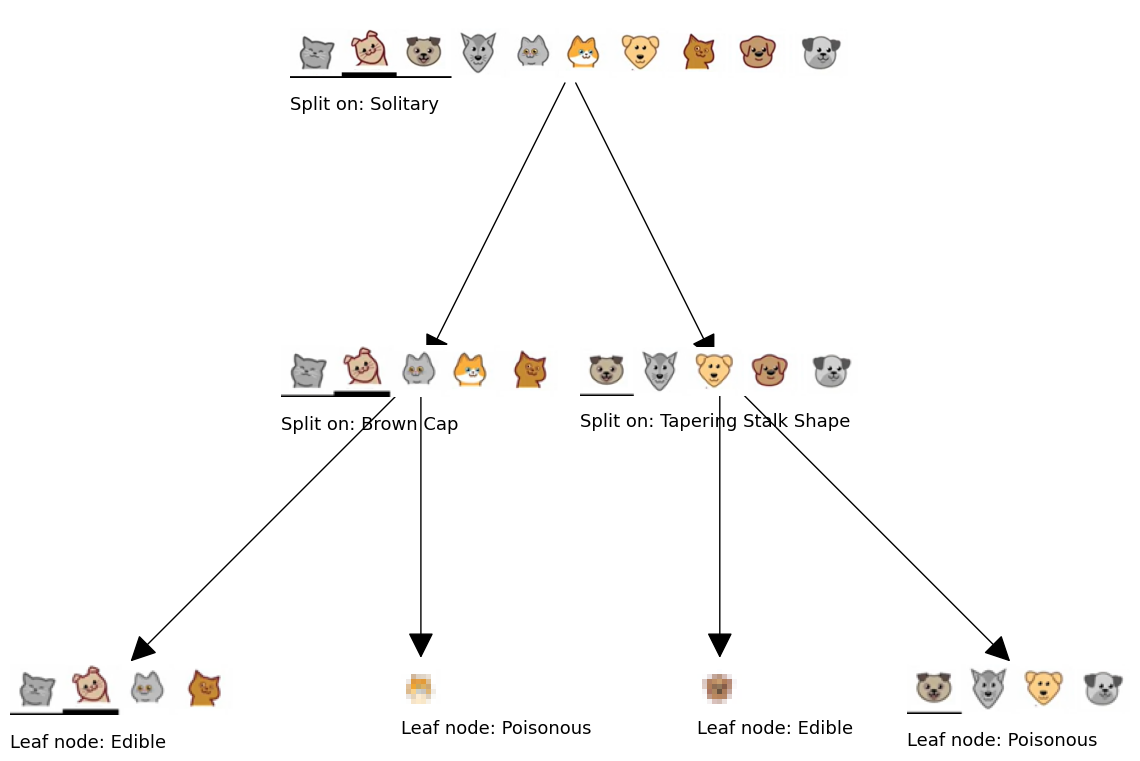

In [15]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)
generate_tree_viz(root_indices, y_train, tree)